In [ ]:

!pip install tensorflow==2.13.1

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
from keras.models import load_model
from keras import Input

from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

from pathlib import Path
DATA_PATH = Path("6th_publishing_paper")
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects
Mounted at /content/gdrive
/content/gdrive/My Drive


# Data Size

In [ ]:

data_size = 6000

number_of_classes_identity = 3
number_of_classes_illuminance = 4
number_of_classes_orientation = 4
number_of_classes_location = 9




In [ ]:

(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

data_train = data_train.reshape(60000, 28, 28)
data_test = data_test.reshape(10000, 28, 28)

data_train_0 = []
data_train_1 = []
data_train_2 = []
data_train_3 = []
data_train_4 = []
data_train_5 = []
data_train_6 = []
data_train_7 = []
data_train_8 = []




for i in range(60000):
  if labels_train[i] == 0:
    data_train_0.append(data_train[i,:,:])
  if labels_train[i] == 1:
    data_train_1.append(data_train[i,:,:])
  if labels_train[i] == 2:
    data_train_2.append(data_train[i,:,:])
  if labels_train[i] == 3:
    data_train_3.append(data_train[i,:,:])
  if labels_train[i] == 4:
    data_train_4.append(data_train[i,:,:])
  if labels_train[i] == 5:
    data_train_5.append(data_train[i,:,:])
  if labels_train[i] == 6:
    data_train_6.append(data_train[i,:,:])
  if labels_train[i] == 7:
    data_train_7.append(data_train[i,:,:])
  if labels_train[i] == 8:
    data_train_8.append(data_train[i,:,:])



data_train_0 = np.asarray(data_train_0)
data_train_1 = np.asarray(data_train_1)
data_train_2 = np.asarray(data_train_2)
data_train_3 = np.asarray(data_train_3)
data_train_4 = np.asarray(data_train_4)
data_train_5 = np.asarray(data_train_5)
data_train_6 = np.asarray(data_train_6)
data_train_7 = np.asarray(data_train_7)
data_train_8 = np.asarray(data_train_8)





4422102/4422102 [==============================] - 1s 0us/step


# 3 Objects

<ipython-input-24-fb481271319b>:182: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A_orientation = int(ii_orientations/(number_of_classes_orientation**2))
<ipython-input-24-fb481271319b>:183: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B_orientation = int((ii_orientations%(number_of_classes_orientation**2))/number_of_classes_orientation)
<ipython-input-24-fb481271319b>:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_orientation = int(ii_orientations%number_o

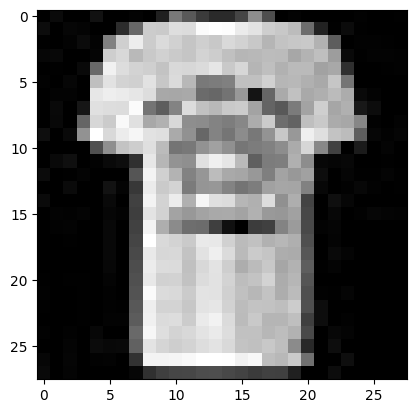

In [ ]:

img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

imageio.imwrite(DATA_PATH / "img.jpg", img)
img = Image.open(DATA_PATH / "img.jpg")

data_images = np.zeros((data_size,140,140))

data_images_identities_without_order = np.zeros(data_size)
data_images_identities_order_by_location = np.zeros(data_size)
data_images_identities_order_by_illuminance = np.zeros(data_size)
data_images_identities_order_by_orientation = np.zeros(data_size)

data_images_illuminance_without_order = np.zeros(data_size)
data_images_illuminance_order_by_location = np.zeros(data_size)
data_images_illuminance_order_by_identity = np.zeros(data_size)
data_images_illuminance_order_by_orientation = np.zeros(data_size)

data_images_locations_without_order = np.zeros(data_size)
data_images_locations_order_by_identity = np.zeros(data_size)
data_images_locations_order_by_orientation = np.zeros(data_size)
data_images_locations_order_by_illuminance = np.zeros(data_size)

data_images_orientations_without_order = np.zeros(data_size)
data_images_orientations_order_by_identity = np.zeros(data_size)
data_images_orientations_order_by_location = np.zeros(data_size)
data_images_orientations_order_by_illuminance = np.zeros(data_size)

for i in range(data_size):

  identity0 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity0 == 0:
    data_0 = data_train_0[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 1:
    data_0 = data_train_1[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 2:
    data_0 = data_train_5[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 3:
    data_0 = data_train_8[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)



  identity1 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity1 == 0:
    data_1 = data_train_0[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 1:
    data_1 = data_train_1[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 2:
    data_1 = data_train_5[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 3:
    data_1 = data_train_8[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)




  identity2 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity2 == 0:
    data_2 = data_train_0[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 1:
    data_2 = data_train_1[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 2:
    data_2 = data_train_5[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 3:
    data_2 = data_train_8[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)




  imageio.imwrite(DATA_PATH / 'data_0.jpg', data_0)
  data_0 = Image.open(DATA_PATH / 'data_0.jpg')
  imageio.imwrite(DATA_PATH / 'data_1.jpg', data_1)
  data_1 = Image.open(DATA_PATH / 'data_1.jpg')
  imageio.imwrite(DATA_PATH / 'data_2.jpg', data_2)
  data_2 = Image.open(DATA_PATH / 'data_2.jpg')




  illuminance_values = [np.mean(data_0), np.mean(data_1), np.mean(data_2)]
  illuminance = []
  for iii in range(3):
    if illuminance_values[iii] < (255/2)/number_of_classes_illuminance:
      illuminance.append(0)

    elif illuminance_values[iii] >= (255/2)/number_of_classes_illuminance and illuminance_values[iii] < 2 * (255/2)/number_of_classes_illuminance:
      illuminance.append(1)

    elif illuminance_values[iii] >= 2 * (255/2)/number_of_classes_illuminance and illuminance_values[iii] < 3 * (255/2)/number_of_classes_illuminance:
      illuminance.append(2)

    else:
      illuminance.append(3)

      # if iii == 0:
        # plt.imshow(data_0, cmap='gray', vmin=0, vmax=255)
      # if iii == 1:
        # plt.imshow(data_1, cmap='gray', vmin=0, vmax=255)
     # if iii == 2:
        # plt.imshow(data_2, cmap='gray', vmin=0, vmax=255)



  params_illuminance = illuminance[:]
  params_illuminance.sort()

  data_images_illuminance_without_order[i] = params_illuminance[0]*(number_of_classes_illuminance**2) + params_illuminance[1]*number_of_classes_illuminance + params_illuminance[2]

  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  illuminance_order_by_identity = []

  for iii in range(3):
    illuminance_order_by_identity.append(illuminance[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    illuminance_order_by_identity = np.sort(illuminance_order_by_identity)
  elif (sorted_identities[0] == sorted_identities[1]):
    illuminance_order_by_identity[0:2] = np.sort(illuminance_order_by_identity[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    illuminance_order_by_identity[1:3] = np.sort(illuminance_order_by_identity[1:3])


  data_images_illuminance_order_by_identity[i] = illuminance_order_by_identity[0]*(number_of_classes_illuminance**2) + illuminance_order_by_identity[1]*number_of_classes_illuminance + illuminance_order_by_identity[2]

  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(illuminance)

  identity_order_by_illuminance = []
  for iii in range(3):
    identity_order_by_illuminance.append(identities[sorted_index[iii]])

  sorted_illuminance = np.sort(illuminance)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    identity_order_by_illuminance = np.sort(identity_order_by_illuminance)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    identity_order_by_illuminance[0:2] = np.sort(identity_order_by_illuminance[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    identity_order_by_illuminance[1:3] = np.sort(identity_order_by_illuminance[1:3])

  data_images_identities_order_by_illuminance[i] = identity_order_by_illuminance[0]*(number_of_classes_identity**2) + identity_order_by_illuminance[1]*number_of_classes_identity + identity_order_by_illuminance[2]









  ii_orientations = rng.choice(number_of_classes_orientation ** 3, size = 1, replace = False)
  A_orientation = int(ii_orientations/(number_of_classes_orientation**2))
  B_orientation = int((ii_orientations%(number_of_classes_orientation**2))/number_of_classes_orientation)
  C_orientation = int(ii_orientations%number_of_classes_orientation)



  params_orientation = [A_orientation,B_orientation,C_orientation]
  params_orientation.sort()
  data_images_orientations_without_order[i] = params_orientation[0]* (number_of_classes_orientation**2) + params_orientation[1]*number_of_classes_orientation + params_orientation[2]


  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  orientations = []
  params_orientation = [A_orientation,B_orientation,C_orientation]
  for iii in range(3):
    orientations.append(params_orientation[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    orientations = np.sort(orientations)
  elif (sorted_identities[0] == sorted_identities[1]):
    orientations[0:2] = np.sort(orientations[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    orientations[1:3] = np.sort(orientations[1:3])

  data_images_orientations_order_by_identity[i] = orientations[0] * (number_of_classes_orientation**2) + orientations[1] * number_of_classes_orientation + orientations[2]










  illumiance_copy = illuminance[:]

  sorted_index = np.argsort(illumiance_copy)

  orientations = []
  params_orientation = [A_orientation,B_orientation,C_orientation]
  for iii in range(3):
    orientations.append(params_orientation[sorted_index[iii]])

  sorted_illuminance = np.sort(illumiance_copy)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    orientations = np.sort(orientations)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    orientations[0:2] = np.sort(orientations[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    orientations[1:3] = np.sort(orientations[1:3])

  data_images_orientations_order_by_illuminance[i] = orientations[0] * (number_of_classes_orientation**2) + orientations[1] * number_of_classes_orientation + orientations[2]





  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  identity_order_by_orientation = []

  for iii in range(3):
    identity_order_by_orientation.append(identities[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]
  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    identity_order_by_orientation = np.sort(identity_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    identity_order_by_orientation[0:2] = np.sort(identity_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    identity_order_by_orientation[1:3] = np.sort(identity_order_by_orientation[1:3])

  data_images_identities_order_by_orientation[i] = number_of_classes_identity**2 * identity_order_by_orientation[0] + number_of_classes_identity * identity_order_by_orientation[1] + identity_order_by_orientation[2]


  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  illuminance_order_by_orientation = []

  for iii in range(3):
    illuminance_order_by_orientation.append(illuminance[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]
  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    illuminance_order_by_orientation = np.sort(illuminance_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    illuminance_order_by_orientation[0:2] = np.sort(illuminance_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    illuminance_order_by_orientation[1:3] = np.sort(illuminance_order_by_orientation[1:3])

  data_images_illuminance_order_by_orientation[i] = number_of_classes_illuminance**2 * illuminance_order_by_orientation[0] + number_of_classes_illuminance * illuminance_order_by_orientation[1] + illuminance_order_by_orientation[2]


  while(1):
    ii = rng.choice((number_of_classes_location**3), size=1, replace=False)
    A = int(ii/(number_of_classes_location**2))
    B = int((ii%(number_of_classes_location**2))/number_of_classes_location)
    C = int(ii%number_of_classes_location)
    if A != B and B != C and A != C:
      break

  params = [A,B,C]
  params.sort()
  data_images_locations_without_order[i] = params[0]*(number_of_classes_location**2) + params[1]*number_of_classes_location + params[2]

  identities = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      identities.append(identity0)
    elif params[iii] == B:
      identities.append(identity1)
    elif params[iii] == C:
      identities.append(identity2)

  data_images_identities_order_by_location[i] = number_of_classes_identity**2 * identities[0] + number_of_classes_identity * identities[1] + identities[2]

  identity_without_order = sorted(identities)

  data_images_identities_without_order[i] = number_of_classes_identity**2 * identity_without_order[0] + number_of_classes_identity * identity_without_order[1] + identity_without_order[2]



  illuminance_order_by_location = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      illuminance_order_by_location.append(illuminance[0])
    elif params[iii] == B:
      illuminance_order_by_location.append(illuminance[1])
    elif params[iii] == C:
      illuminance_order_by_location.append(illuminance[2])

  data_images_illuminance_order_by_location[i] = number_of_classes_illuminance**2 * illuminance_order_by_location[0] + number_of_classes_illuminance * illuminance_order_by_location[1] + illuminance_order_by_location[2]

  orientation_order_by_location = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      orientation_order_by_location.append(A_orientation)
    elif params[iii] == B:
      orientation_order_by_location.append(B_orientation)
    elif params[iii] == C:
      orientation_order_by_location.append(C_orientation)

  data_images_orientations_order_by_location[i] = (number_of_classes_orientation**2) * orientation_order_by_location[0] + number_of_classes_orientation * orientation_order_by_location[1] + orientation_order_by_location[2]




  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  locations = []
  params = [A,B,C]
  for iii in range(3):
    locations.append(params[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    locations = np.sort(locations)
  elif (sorted_identities[0] == sorted_identities[1]):
    locations[0:2] = np.sort(locations[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    locations[1:3] = np.sort(locations[1:3])

  data_images_locations_order_by_identity[i] = locations[0]*(number_of_classes_location**2) + locations[1]*number_of_classes_location + locations[2]







  illumiance_copy = illuminance[:]

  sorted_index = np.argsort(illumiance_copy)

  locations = []
  params_locations = [A,B,C]
  for iii in range(3):
    locations.append(params_locations[sorted_index[iii]])

  sorted_illuminance = np.sort(illumiance_copy)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    locations = np.sort(locations)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    locations[0:2] = np.sort(locations[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    locations[1:3] = np.sort(locations[1:3])

  data_images_locations_order_by_illuminance[i] = locations[0] * (number_of_classes_location**2) + locations[1] * number_of_classes_location + locations[2]







  locations = []
  params_locations = [A,B,C]

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  location_order_by_orientation = []

  for iii in range(3):
    location_order_by_orientation.append(params_locations[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    location_order_by_orientation = np.sort(location_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    location_order_by_orientation[0:2] = np.sort(location_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    location_order_by_orientation[1:3] = np.sort(location_order_by_orientation[1:3])

  data_images_locations_order_by_orientation[i] = (number_of_classes_location**2) * location_order_by_orientation[0] + number_of_classes_location * location_order_by_orientation[1] + location_order_by_orientation[2]










  back_im = img.copy()

  location_1 = A
  location_2 = B
  location_3 = C


  data_0 = data_0.rotate(A_orientation*90)
  data_1 = data_1.rotate(B_orientation*90)
  data_2 = data_2.rotate(C_orientation*90)

  x1 = 28 + (location_1%3)*28
  y1 = 28 + (int(location_1/3))*28

  back_im.paste(data_0,(x1,y1))

  x2 = 28 + (location_2%3)*28
  y2 = 28 + (int(location_2/3))*28
  back_im.paste(data_1,(x2,y2))

  x3 = 28 + (location_3%3)*28
  y3 = 28 + (int(location_3/3))*28
  back_im.paste(data_2,(x3,y3))


  data_images[i,:,:] = np.asarray(back_im)





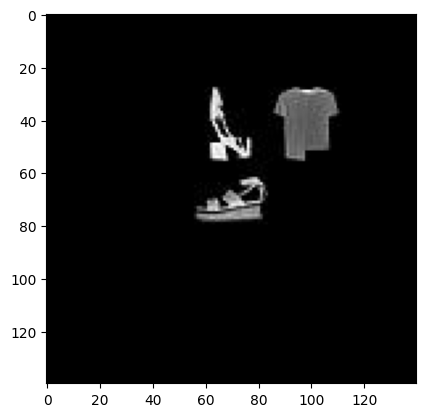

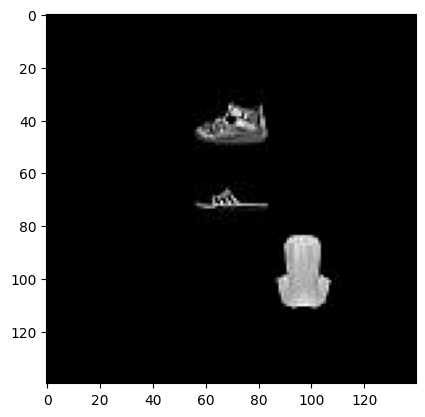

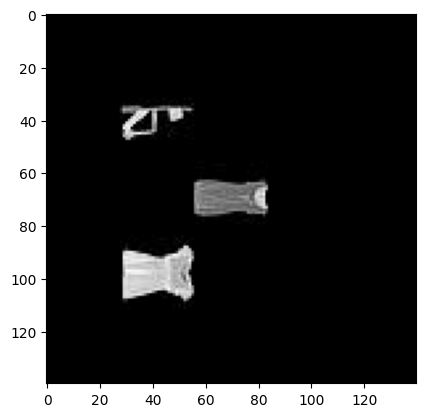

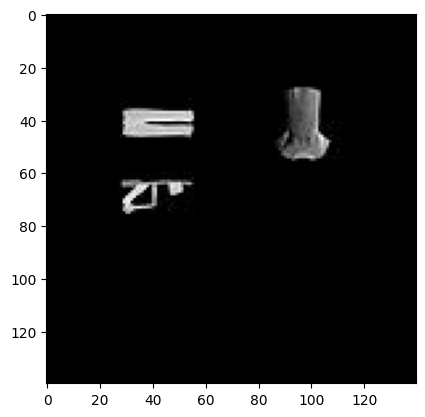

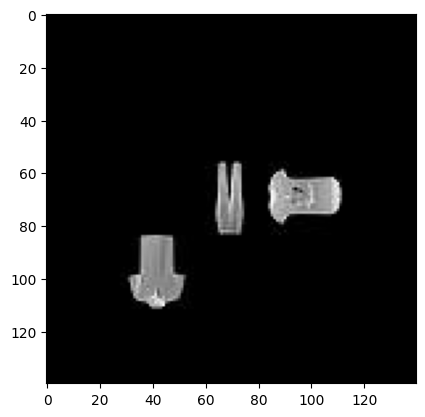

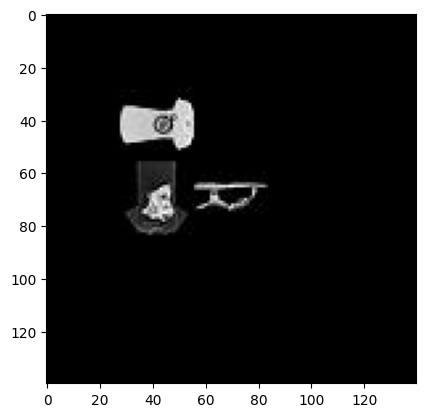

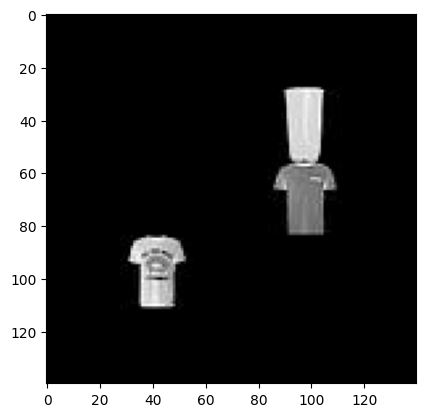

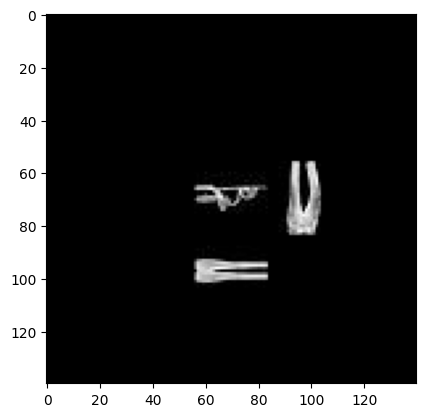

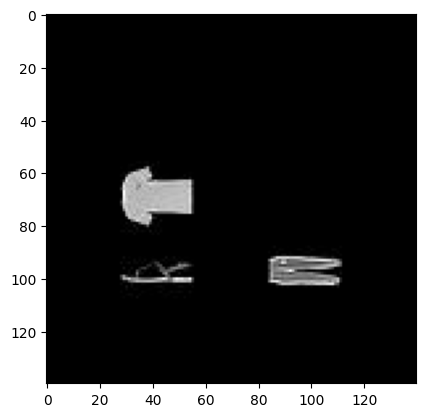

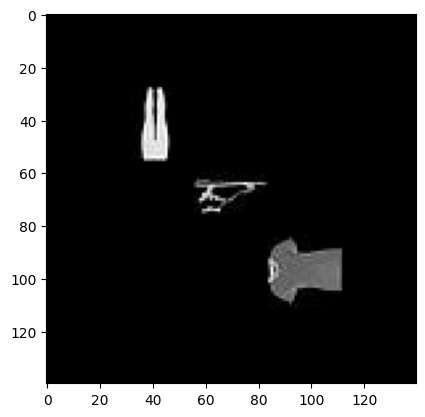

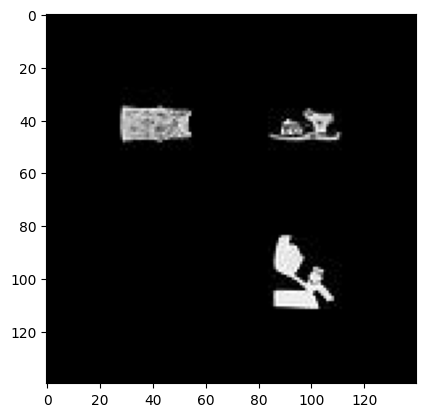

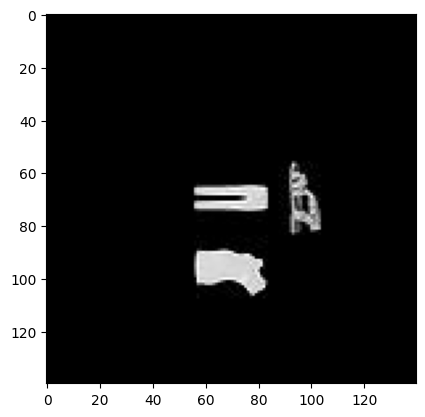

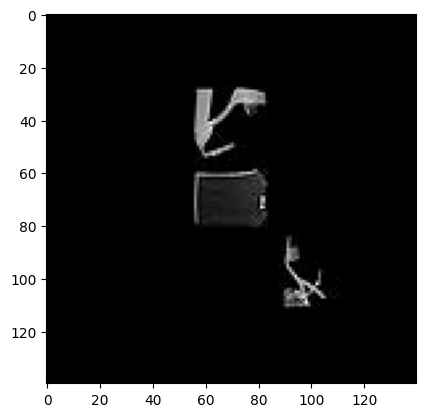

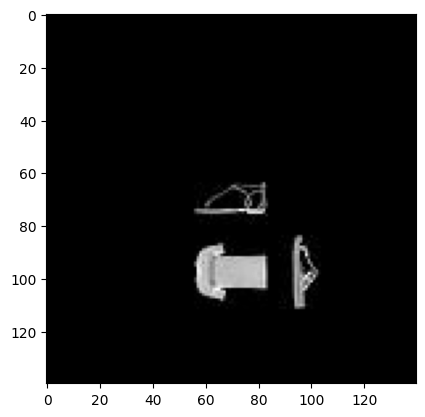

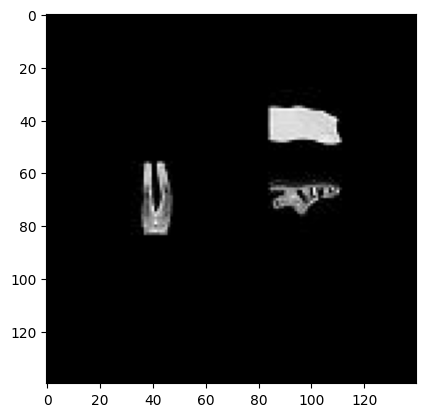

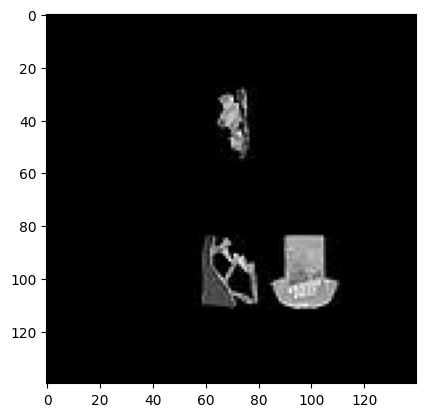

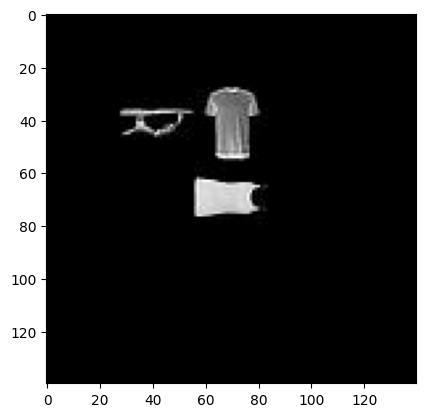

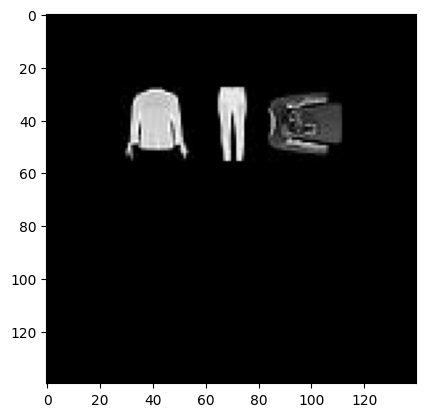

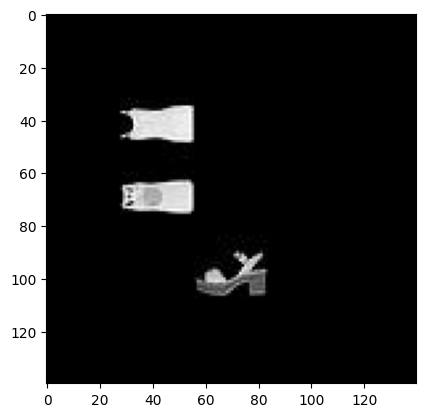

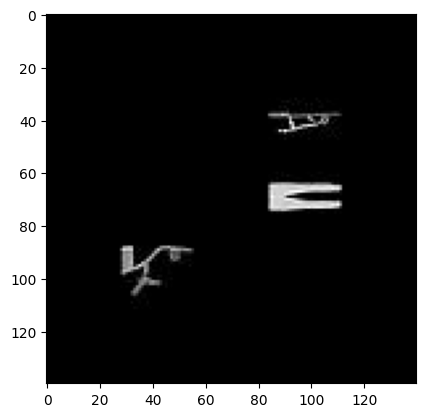

In [ ]:

start = 50
for i in range(start + 0, start + 20):
    plt.imshow(data_images[i,:,:], cmap='gray', vmin=0, vmax=255)

    plt.show()


In [ ]:

data_images = data_images.reshape(data_size,140,140)



import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_images_identities_order_by_location, data_images_identities_order_by_illuminance, data_images_illuminance_without_order, data_images_illuminance_order_by_location, data_images_illuminance_order_by_identity, data_images_locations_without_order, data_images_locations_order_by_identity, data_images_locations_order_by_orientation, data_images_orientations_without_order, data_images_orientations_order_by_identity, data_images_orientations_order_by_location, n_px, n_channels = 1):



        #This function converts images to numpy arrays and writes the array data into a h5 file.

        #dest_filepath - the name of the file with full path that is being created
        #filepaths_list - source image file paths which is being converted to numpy arrays
        #n_px - number of pixels - will be used as image's height and width
        #n_channels - 3 for rgb



    data_shape = (filepaths_list.shape[0], n_px,n_px)

    data_shape2 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_images"

    dataset_name2 = "data_images_identities_without_order"
    dataset_name3 = "data_images_identities_order_by_location"
    dataset_name4 = "data_images_identities_order_by_illuminance"

    dataset_name5 = "data_images_illuminance_without_order"
    dataset_name6 = "data_images_illuminance_order_by_location"
    dataset_name7 = "data_images_illuminance_order_by_identity"

    dataset_name8 = "data_images_locations_without_order"
    dataset_name9 = "data_images_locations_order_by_identity"
    dataset_name10 = "data_images_locations_order_by_orientation"

    dataset_name11 = "data_images_orientations_without_order"
    dataset_name12 = "data_images_orientations_order_by_identity"
    dataset_name13 = "data_images_orientations_order_by_location"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)

        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape2, np.float32)
        f.create_dataset(dataset_name4, data_shape2, np.float32)

        f.create_dataset(dataset_name5, data_shape2, np.float32)
        f.create_dataset(dataset_name6, data_shape2, np.float32)
        f.create_dataset(dataset_name7, data_shape2, np.float32)

        f.create_dataset(dataset_name8, data_shape2, np.float32)
        f.create_dataset(dataset_name9, data_shape2, np.float32)
        f.create_dataset(dataset_name10, data_shape2, np.float32)

        f.create_dataset(dataset_name11, data_shape2, np.float32)
        f.create_dataset(dataset_name12, data_shape2, np.float32)
        f.create_dataset(dataset_name13, data_shape2, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_images = filepaths_list[i,:,:]

            data_images_identities_without_order0 = filepaths_list2[i]
            data_images_identities_order_by_location0 = data_images_identities_order_by_location[i]
            data_images_identities_order_by_illuminance0 = data_images_identities_order_by_illuminance[i]

            data_images_illuminance_without_order0 = data_images_illuminance_without_order[i]
            data_images_illuminance_order_by_location0 = data_images_illuminance_order_by_location[i]
            data_images_illuminance_order_by_identity0 = data_images_illuminance_order_by_identity[i]

            data_images_locations_without_order0 = data_images_locations_without_order[i]
            data_images_locations_order_by_identity0 = data_images_locations_order_by_identity[i]
            data_images_locations_order_by_orientation0 = data_images_locations_order_by_orientation[i]

            data_images_orientations_without_order0 = data_images_orientations_without_order[i]
            data_images_orientations_order_by_identity0 = data_images_orientations_order_by_identity[i]
            data_images_orientations_order_by_location0 = data_images_orientations_order_by_location[i]

            f[dataset_name1][i, ...] = data_images[None]

            f[dataset_name2][i, ...] = data_images_identities_without_order0
            f[dataset_name3][i, ...] = data_images_identities_order_by_location0
            f[dataset_name4][i, ...] = data_images_identities_order_by_illuminance0

            f[dataset_name5][i, ...] = data_images_illuminance_without_order0
            f[dataset_name6][i, ...] = data_images_illuminance_order_by_location0
            f[dataset_name7][i, ...] = data_images_illuminance_order_by_identity0

            f[dataset_name8][i, ...] = data_images_locations_without_order0
            f[dataset_name9][i, ...] = data_images_locations_order_by_identity0
            f[dataset_name10][i, ...] = data_images_locations_order_by_orientation0

            f[dataset_name11][i, ...] = data_images_orientations_without_order0
            f[dataset_name12][i, ...] = data_images_orientations_order_by_identity0
            f[dataset_name13][i, ...] = data_images_orientations_order_by_location0



write_data_into_h5_file(DATA_PATH / 'Data_Images_3_Objects', data_images,data_images_identities_without_order, data_images_identities_order_by_location, data_images_identities_order_by_illuminance, data_images_illuminance_without_order, data_images_illuminance_order_by_location, data_images_illuminance_order_by_identity, data_images_locations_without_order, data_images_locations_order_by_identity, data_images_locations_order_by_orientation, data_images_orientations_without_order, data_images_orientations_order_by_identity, data_images_orientations_order_by_location, 140, n_channels = 1)





# After Data Preparation

In [ ]:

data_size = 6000

number_of_repetitions = 3

number_of_classes_identity = 3
number_of_classes_illuminance = 4
number_of_classes_orientation = 4
number_of_classes_location = 9


In [ ]:

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
from keras.models import load_model
from keras import Input

from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

from pathlib import Path
DATA_PATH = Path("6th_publishing_paper")
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (h5py)
Mounted at /content/gdrive
/content/gdrive/My Drive


# Load Data

In [ ]:

def load_and_split_data(cross_validation_round = 0):

  def keys(f):
    return [key for key in f.keys()]

  f = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')

  data_images = np.asarray(f['data_images'])

  data_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])

  data_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])

  data_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])

  data_images_orientations_order_by_location = np.asarray(f['data_images_orientations_order_by_location'])


  data_images = np.reshape(data_images,[data_size,140,140,1])

  # np.random.shuffle(data_images) # shuffle the images

  # divide the dataset into 6 parts

  data_images_part_01 = data_images[0:int((1/6)*data_size),:,:,:]/255

  data_images_part_02 = data_images[int((1/6)*data_size):int((2/6)*data_size),:,:,:]/255

  data_images_part_03 = data_images[int((2/6)*data_size):int((3/6)*data_size),:,:,:]/255

  data_images_part_04 = data_images[int((3/6)*data_size):int((4/6)*data_size),:,:,:]/255

  data_images_part_05 = data_images[int((4/6)*data_size):int((5/6)*data_size),:,:,:]/255

  data_images_part_06 = data_images[int((5/6)*data_size):int((1)*data_size),:,:,:]/255



  if (cross_validation_round == 0):

    train_data_images = np.concatenate((data_images_part_01, data_images_part_02, data_images_part_03, data_images_part_04), axis=0)

    validation_data_images = data_images_part_05

    test_data_images = data_images_part_06

    # training

    train_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((2/3)*data_size)]

    train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((2/3)*data_size)]

    train_data_images_locations_without_order = data_images_locations_without_order[0:int((2/3)*data_size)]

    train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((2/3)*data_size)]

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((5/6)*data_size):int((1)*data_size)]


  elif (cross_validation_round == 1):

    train_data_images = np.concatenate((data_images_part_03, data_images_part_04, data_images_part_05, data_images_part_06), axis=0)

    validation_data_images = data_images_part_01

    test_data_images = data_images_part_02

    # training

    train_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_locations_without_order = data_images_locations_without_order[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((1/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((1/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[0:int((1/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((1/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

  else:

    train_data_images = np.concatenate((data_images_part_01, data_images_part_02, data_images_part_05, data_images_part_06), axis=0)

    validation_data_images = data_images_part_03

    test_data_images = data_images_part_04

    # training

    train_data_images_identities_order_by_location = np.concatenate((data_images_identities_order_by_location[0:int((1/3)*data_size)], data_images_identities_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_illuminance_order_by_location = np.concatenate((data_images_illuminance_order_by_location[0:int((1/3)*data_size)], data_images_illuminance_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_locations_without_order = np.concatenate((data_images_locations_without_order[0:int((1/3)*data_size)], data_images_locations_without_order[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_orientations_order_by_location = np.concatenate((data_images_orientations_order_by_location[0:int((1/3)*data_size)], data_images_orientations_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]



  return train_data_images_identities_order_by_location, train_data_images_illuminance_order_by_location, \
  train_data_images_orientations_order_by_location,  train_data_images_locations_without_order, \
  validation_data_images_identities_order_by_location, validation_data_images_illuminance_order_by_location, \
  validation_data_images_orientations_order_by_location, validation_data_images_locations_without_order, \
  test_data_images_identities_order_by_location, test_data_images_illuminance_order_by_location, \
  test_data_images_orientations_order_by_location, test_data_images_locations_without_order, \
  train_data_images, validation_data_images, test_data_images




In [ ]:

'''

import h5py

def keys(f):
    return [key for key in f.keys()]

f = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')



# print(keys(f))


data_images = np.asarray(f['data_images'])

data_images_identities_without_order = np.asarray(f['data_images_identities_without_order'])

data_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])

data_images_identities_order_by_illuminance = np.asarray(f['data_images_identities_order_by_illuminance'])


data_images_illuminance_without_order = np.asarray(f['data_images_illuminance_without_order'])

data_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])

data_images_illuminance_order_by_identity = np.asarray(f['data_images_illuminance_order_by_identity'])


data_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])

data_images_locations_order_by_identity = np.asarray(f['data_images_locations_order_by_identity'])

data_images_locations_order_by_orientation = np.asarray(f['data_images_locations_order_by_orientation'])


data_images_orientations_without_order = np.asarray(f['data_images_orientations_without_order'])

data_images_orientations_order_by_identity = np.asarray(f['data_images_orientations_order_by_identity'])

data_images_orientations_order_by_location = np.asarray(f['data_images_orientations_order_by_location'])



data_images = np.reshape(data_images,[data_size,140,140,1])

train_data_images = data_images[0:int((2/3)*data_size),:,:,:]/255

validation_data_images = data_images[int((2/3)*data_size):int((5/6)*data_size),:,:,:]/255

test_data_images = data_images[int((5/6)*data_size):int((1)*data_size),:,:,:]/255

# training

train_data_images_identities_without_order = data_images_identities_without_order[0:int((2/3)*data_size)]

train_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((2/3)*data_size)]

train_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[0:int((2/3)*data_size)]


train_data_images_illuminance_without_order = data_images_illuminance_without_order[0:int((2/3)*data_size)]

train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((2/3)*data_size)]

train_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[0:int((2/3)*data_size)]


train_data_images_locations_without_order = data_images_locations_without_order[0:int((2/3)*data_size)]

train_data_images_locations_order_by_identity = data_images_locations_order_by_identity[0:int((2/3)*data_size)]

train_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[0:int((2/3)*data_size)]


train_data_images_orientations_without_order = data_images_orientations_without_order[0:int((2/3)*data_size)]

train_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[0:int((2/3)*data_size)]

train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((2/3)*data_size)]

# validation



validation_data_images_identities_without_order = data_images_identities_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_illuminance_without_order = data_images_illuminance_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_locations_without_order = data_images_locations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_locations_order_by_identity = data_images_locations_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_orientations_without_order = data_images_orientations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

# testing

test_data_images_identities_without_order = data_images_identities_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((5/6)*data_size):int((1)*data_size)]

test_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[int((5/6)*data_size):int((1)*data_size)]


test_data_images_illuminance_without_order = data_images_illuminance_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((5/6)*data_size):int((1)*data_size)]

test_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[int((5/6)*data_size):int((1)*data_size)]


test_data_images_locations_without_order = data_images_locations_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_locations_order_by_identity = data_images_locations_order_by_identity[int((5/6)*data_size):int((1)*data_size)]

test_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[int((5/6)*data_size):int((1)*data_size)]


test_data_images_orientations_without_order = data_images_orientations_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[int((5/6)*data_size):int((1)*data_size)]

test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((5/6)*data_size):int((1)*data_size)]



'''


"\n\nimport h5py\n\ndef keys(f):\n    return [key for key in f.keys()]\n\nf = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')\n\n\n\n# print(keys(f))\n\n\ndata_images = np.asarray(f['data_images'])\n\ndata_images_identities_without_order = np.asarray(f['data_images_identities_without_order'])\n\ndata_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])\n\ndata_images_identities_order_by_illuminance = np.asarray(f['data_images_identities_order_by_illuminance'])\n\n\ndata_images_illuminance_without_order = np.asarray(f['data_images_illuminance_without_order'])\n\ndata_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])\n\ndata_images_illuminance_order_by_identity = np.asarray(f['data_images_illuminance_order_by_identity'])\n\n\ndata_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])\n\ndata_images_locations_order_by_identity = np.asarray(f['data_images_locations

# Network Two Pathways

# Identity Network Order by Location

In [ ]:

'''
from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_identities_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()

'''


'\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,acti

# Illuminance Network Order by Location

In [ ]:

'''

from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_illuminance_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()

'''

'\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,ac

# Orientation Network Order by Location

In [ ]:

'''

from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_orientations_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()

'''


'\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,ac

# Location Network Without Order

In [ ]:

'''

from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_locations_without_order.h5")
CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()

'''


'\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,ac

## Network two pathways Identity and Illuminance (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[1] # train_data_images_illuminance_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_illuminance_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[5] # validation_data_images_illuminance_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_illuminance_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[9] # test_data_images_illuminance_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_illuminance_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)


  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")


  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)


  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")




  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_illuminance ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0347 - loss: 3.2979 - val_accuracy: 0.0350 - val_loss: 3.2965
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0418 - loss: 3.2909 - val_accuracy: 0.0510 - val_loss: 3.2847
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0405 - loss: 3.2729 - val_accuracy: 0.0560 - val_loss: 3.2402
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0601 - loss: 3.2055 - val_accuracy: 0.0710 - val_loss: 3.1205
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1027 - loss: 3.0914 - val_accuracy: 0.1290 - val_loss: 2.8666
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1474 - loss: 2.8627 - val_accuracy: 0.2290 - val_loss: 2.6039
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1979 - loss: 2.6294 - val_accuracy: 0.2840 - val_loss: 2.4291
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2627 - loss: 2.4429 - val_accuracy: 0.3

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 700ms/step - accuracy: 0.0510 - loss: 4.0852 - val_accuracy: 0.0880 - val_loss: 3.9465
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0999 - loss: 3.9065 - val_accuracy: 0.0880 - val_loss: 3.8545
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1020 - loss: 3.8286 - val_accuracy: 0.0880 - val_loss: 3.8071
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0880 - loss: 3.7899 - val_accuracy: 0.0880 - val_loss: 3.7431
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1019 - loss: 3.7165 - val_accuracy: 0.0880 - val_loss: 3.7415
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0967 - loss: 3.7263 - val_accuracy: 0.0880 - val_loss: 3.7033
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1003 - loss: 3.6753 - val_accuracy: 0.0880 - val_loss: 3.6454
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0951 - loss: 3.6

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 949ms/step - accuracy: 0.0032 - loss: 7.3474 - val_accuracy: 0.0150 - val_loss: 6.4019
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0126 - loss: 6.2679 - val_accuracy: 0.0320 - val_loss: 5.9779
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0207 - loss: 5.7950 - val_accuracy: 0.0530 - val_loss: 5.4899
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0496 - loss: 5.3733 - val_accuracy: 0.1240 - val_loss: 4.9693
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0884 - loss: 4.9040 - val_accuracy: 0.2060 - val_loss: 4.4748
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1244 - loss: 4.4338 - val_accuracy: 0.2640 - val_loss: 4.1232
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1560 - loss: 4.0661 - val_accuracy: 0.3030 - val_loss: 3.7933
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1822 - loss: 3.7834 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.0533 - loss: 4.0863 - val_accuracy: 0.0980 - val_loss: 3.8915
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0956 - loss: 3.9111 - val_accuracy: 0.0980 - val_loss: 3.8346
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1026 - loss: 3.8299 - val_accuracy: 0.0980 - val_loss: 3.7980
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1009 - loss: 3.7683 - val_accuracy: 0.0980 - val_loss: 3.7251
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1039 - loss: 3.7254 - val_accuracy: 0.0980 - val_loss: 3.6985
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0934 - loss: 3.6816 - val_accuracy: 0.0980 - val_loss: 3.6721
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0921 - loss: 3.6762 - val_accuracy: 0.0850 - val_loss: 3.9200
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0985 - loss: 3.75

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 450ms/step - accuracy: 0.0033 - loss: 7.3347 - val_accuracy: 0.0080 - val_loss: 6.3620
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0130 - loss: 6.2481 - val_accuracy: 0.0270 - val_loss: 5.9630
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0262 - loss: 5.8070 - val_accuracy: 0.0870 - val_loss: 5.5988
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0543 - loss: 5.4468 - val_accuracy: 0.1220 - val_loss: 5.0899
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0799 - loss: 4.9752 - val_accuracy: 0.1870 - val_loss: 4.6488
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1137 - loss: 4.5555 - val_accuracy: 0.2480 - val_loss: 4.2373
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1481 - loss: 4.1870 - val_accuracy: 0.2960 - val_loss: 3.9097
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1737 - loss: 3.8049 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.0469 - loss: 4.1029 - val_accuracy: 0.1020 - val_loss: 3.9068
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0758 - loss: 3.8993 - val_accuracy: 0.1020 - val_loss: 3.8115
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0913 - loss: 3.8254 - val_accuracy: 0.1020 - val_loss: 3.7625
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0895 - loss: 3.7854 - val_accuracy: 0.1020 - val_loss: 3.7276
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0824 - loss: 3.7284 - val_accuracy: 0.1020 - val_loss: 3.6810
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0925 - loss: 3.6943 - val_accuracy: 0.1030 - val_loss: 3.6359
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0875 - loss: 3.6148 - val_accuracy: 0.1050 - val_loss: 3.5448
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0989 - loss: 3.53

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.0023 - loss: 7.3407 - val_accuracy: 0.0110 - val_loss: 6.4188
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0158 - loss: 6.2600 - val_accuracy: 0.0330 - val_loss: 6.0314
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0211 - loss: 5.7838 - val_accuracy: 0.0360 - val_loss: 5.6232
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0591 - loss: 5.3557 - val_accuracy: 0.1110 - val_loss: 5.1366
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0807 - loss: 4.9218 - val_accuracy: 0.1600 - val_loss: 4.7460
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1115 - loss: 4.4896 - val_accuracy: 0.1940 - val_loss: 4.3718
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1394 - loss: 4.1173 - val_accuracy: 0.2230 - val_loss: 4.0579
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1810 - loss: 3.7912 - val_accuracy: 

In [ ]:

print(accuracy)

[0.6940000057220459, 0.6769999861717224, 0.6539999842643738]


## Network two pathways Identity and Location (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_identities_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_identities_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)


  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")



  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)





Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.0450 - loss: 3.2987 - val_accuracy: 0.0360 - val_loss: 3.2946
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0476 - loss: 3.2902 - val_accuracy: 0.0420 - val_loss: 3.2866
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0503 - loss: 3.2725 - val_accuracy: 0.0560 - val_loss: 3.2445
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0644 - loss: 3.2158 - val_accuracy: 0.1070 - val_loss: 3.0799
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1316 - loss: 3.0101 - val_accuracy: 0.2180 - val_loss: 2.7192
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2011 - loss: 2.6998 - val_accuracy: 0.3030 - val_loss: 2.2777
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2887 - loss: 2.3278 - val_accuracy: 0.3710 - val_loss: 2.1100
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3331 - loss: 2.1334 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 971ms/step - accuracy: 0.0117 - loss: 6.1793 - val_accuracy: 0.2670 - val_loss: 3.5345
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1961 - loss: 3.5251 - val_accuracy: 0.8780 - val_loss: 0.9987
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4996 - loss: 1.7674 - val_accuracy: 0.9900 - val_loss: 0.1621
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7423 - loss: 0.8525 - val_accuracy: 0.9990 - val_loss: 0.0158
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8559 - loss: 0.4556 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9069 - loss: 0.2795 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9308 - loss: 0.2111 - val_accuracy: 1.0000 - val_loss: 5.9546e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9389 - loss:

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 2.2709e-04 - loss: 9.8030 - val_accuracy: 0.0000e+00 - val_loss: 8.8836
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0014 - loss: 8.0365 - val_accuracy: 0.0050 - val_loss: 8.4580
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0041 - loss: 7.4969 - val_accuracy: 0.0170 - val_loss: 8.1990
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0137 - loss: 7.1083 - val_accuracy: 0.0170 - val_loss: 7.9046
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0209 - loss: 6.6494 - val_accuracy: 0.0350 - val_loss: 7.6121
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0263 - loss: 6.2051 - val_accuracy: 0.0580 - val_loss: 7.2647
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0400 - loss: 5.7735 - val_accuracy: 0.0600 - val_loss: 6.9018
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0491 - loss: 5.3684 - val_accur

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.0184 - loss: 6.1308 - val_accuracy: 0.2790 - val_loss: 3.2214
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1642 - loss: 3.5461 - val_accuracy: 0.8440 - val_loss: 1.1563
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4598 - loss: 1.8958 - val_accuracy: 0.9850 - val_loss: 0.1752
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7143 - loss: 0.9107 - val_accuracy: 0.9980 - val_loss: 0.0340
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8515 - loss: 0.4812 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8957 - loss: 0.3390 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9399 - loss: 0.1884 - val_accuracy: 1.0000 - val_loss: 6.7604e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9393 - loss: 

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step - accuracy: 4.4943e-04 - loss: 9.8011 - val_accuracy: 0.0000e+00 - val_loss: 8.9073
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0014 - loss: 8.0272 - val_accuracy: 0.0060 - val_loss: 8.5067
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0028 - loss: 7.5176 - val_accuracy: 0.0100 - val_loss: 8.2461
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0121 - loss: 7.1642 - val_accuracy: 0.0260 - val_loss: 8.0319
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0192 - loss: 6.6989 - val_accuracy: 0.0360 - val_loss: 7.6849
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0317 - loss: 6.2685 - val_accuracy: 0.0470 - val_loss: 7.2783
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0372 - loss: 5.7243 - val_accuracy: 0.0590 - val_loss: 6.9507
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0512 - loss: 5.3573 - val_ac

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.0197 - loss: 6.1278 - val_accuracy: 0.3400 - val_loss: 3.1312
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2082 - loss: 3.3202 - val_accuracy: 0.8850 - val_loss: 0.8787
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4966 - loss: 1.7532 - val_accuracy: 0.9940 - val_loss: 0.1273
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7562 - loss: 0.8195 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8588 - loss: 0.4333 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9183 - loss: 0.2650 - val_accuracy: 1.0000 - val_loss: 4.8584e-04
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9417 - loss: 0.1832 - val_accuracy: 1.0000 - val_loss: 1.6537e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9462 - lo

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 470ms/step - accuracy: 4.6330e-04 - loss: 9.8039 - val_accuracy: 0.0000e+00 - val_loss: 8.9632
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0021 - loss: 8.0533 - val_accuracy: 0.0020 - val_loss: 8.5669
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0026 - loss: 7.4992 - val_accuracy: 0.0080 - val_loss: 8.2877
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0157 - loss: 7.0807 - val_accuracy: 0.0110 - val_loss: 8.0146
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0195 - loss: 6.6562 - val_accuracy: 0.0280 - val_loss: 7.7160
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0307 - loss: 6.1640 - val_accuracy: 0.0410 - val_loss: 7.3665
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0386 - loss: 5.8030 - val_accuracy: 0.0440 - val_loss: 7.1444
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0491 - loss: 5.4361 - val_ac

In [ ]:

print(accuracy)

[0.7450000047683716, 0.7699999809265137, 0.7639999985694885]


## Network two pathways Identity and Orientation (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")



  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_orientation ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)



Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.0394 - loss: 3.2982 - val_accuracy: 0.0430 - val_loss: 3.2938
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0410 - loss: 3.2887 - val_accuracy: 0.0390 - val_loss: 3.2865
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0516 - loss: 3.2720 - val_accuracy: 0.0540 - val_loss: 3.2466
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0693 - loss: 3.2132 - val_accuracy: 0.0870 - val_loss: 3.1916
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1104 - loss: 3.1160 - val_accuracy: 0.1900 - val_loss: 2.9236
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1657 - loss: 2.8714 - val_accuracy: 0.2540 - val_loss: 2.5269
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2219 - loss: 2.5782 - val_accuracy: 0.3140 - val_loss: 2.2895
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2935 - loss: 2.2958 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.0128 - loss: 4.1610 - val_accuracy: 0.0190 - val_loss: 4.1592
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0173 - loss: 4.1568 - val_accuracy: 0.0130 - val_loss: 4.1600
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0164 - loss: 4.1535 - val_accuracy: 0.0140 - val_loss: 4.1586
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0195 - loss: 4.1439 - val_accuracy: 0.0150 - val_loss: 4.1482
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0233 - loss: 4.1131 - val_accuracy: 0.0260 - val_loss: 4.0881
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0251 - loss: 4.0625 - val_accuracy: 0.0360 - val_loss: 4.0126
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0361 - loss: 3.9655 - val_accuracy: 0.0490 - val_loss: 3.8956
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0493 - loss: 3.83

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 415ms/step - accuracy: 1.6736e-04 - loss: 7.4676 - val_accuracy: 0.0010 - val_loss: 7.4476
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0011 - loss: 7.3981 - val_accuracy: 0.0020 - val_loss: 7.4347
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0046 - loss: 7.2622 - val_accuracy: 0.0060 - val_loss: 7.4140
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0061 - loss: 7.0537 - val_accuracy: 0.0160 - val_loss: 7.2867
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0120 - loss: 6.7790 - val_accuracy: 0.0180 - val_loss: 7.0975
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0260 - loss: 6.4290 - val_accuracy: 0.0350 - val_loss: 6.8588
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0255 - loss: 6.0520 - val_accuracy: 0.0590 - val_loss: 6.5598
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0507 - loss: 5.6163 - val_accura

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.0161 - loss: 4.1618 - val_accuracy: 0.0220 - val_loss: 4.1577
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0184 - loss: 4.1572 - val_accuracy: 0.0140 - val_loss: 4.1564
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0214 - loss: 4.1557 - val_accuracy: 0.0100 - val_loss: 4.1534
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0264 - loss: 4.1399 - val_accuracy: 0.0170 - val_loss: 4.1343
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0277 - loss: 4.1055 - val_accuracy: 0.0320 - val_loss: 4.0585
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0367 - loss: 4.0308 - val_accuracy: 0.0250 - val_loss: 3.9932
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0514 - loss: 3.9472 - val_accuracy: 0.0450 - val_loss: 3.8754
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0519 - loss: 3.82

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.0012 - loss: 7.4683 - val_accuracy: 0.0030 - val_loss: 7.4405
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0025 - loss: 7.3854 - val_accuracy: 0.0010 - val_loss: 7.4091
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0046 - loss: 7.2282 - val_accuracy: 0.0090 - val_loss: 7.3457
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0073 - loss: 6.9944 - val_accuracy: 0.0220 - val_loss: 7.2060
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0150 - loss: 6.6732 - val_accuracy: 0.0350 - val_loss: 6.9524
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0226 - loss: 6.2348 - val_accuracy: 0.0560 - val_loss: 6.6209
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0372 - loss: 5.8785 - val_accuracy: 0.0800 - val_loss: 6.2924
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0528 - loss: 5.4472 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - accuracy: 0.0174 - loss: 4.1637 - val_accuracy: 0.0110 - val_loss: 4.1598
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0157 - loss: 4.1569 - val_accuracy: 0.0110 - val_loss: 4.1603
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0201 - loss: 4.1552 - val_accuracy: 0.0150 - val_loss: 4.1655
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0193 - loss: 4.1522 - val_accuracy: 0.0190 - val_loss: 4.1553
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0225 - loss: 4.1376 - val_accuracy: 0.0280 - val_loss: 4.1086
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0351 - loss: 4.0721 - val_accuracy: 0.0420 - val_loss: 4.0204
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0385 - loss: 3.9829 - val_accuracy: 0.0430 - val_loss: 3.8400
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0516 - loss: 3.85

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 3.2835e-04 - loss: 7.4635 - val_accuracy: 0.0010 - val_loss: 7.4436
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0025 - loss: 7.3995 - val_accuracy: 0.0000e+00 - val_loss: 7.4198
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0035 - loss: 7.2370 - val_accuracy: 0.0040 - val_loss: 7.3687
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0054 - loss: 7.0127 - val_accuracy: 0.0060 - val_loss: 7.2360
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0151 - loss: 6.7092 - val_accuracy: 0.0220 - val_loss: 6.9875
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0243 - loss: 6.3274 - val_accuracy: 0.0440 - val_loss: 6.6946
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0353 - loss: 5.8734 - val_accuracy: 0.0800 - val_loss: 6.3245
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0462 - loss: 5.5105 - val_ac

In [ ]:

print(accuracy)

[0.6890000104904175, 0.6899999976158142, 0.6949999928474426]


## Network two pathways Orientation and Location (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")





  model_1 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))




print(accuracy)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.0212 - loss: 4.1620 - val_accuracy: 0.0140 - val_loss: 4.1586
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0188 - loss: 4.1576 - val_accuracy: 0.0150 - val_loss: 4.1596
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0249 - loss: 4.1549 - val_accuracy: 0.0100 - val_loss: 4.1589
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0198 - loss: 4.1497 - val_accuracy: 0.0150 - val_loss: 4.1601
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0234 - loss: 4.1388 - val_accuracy: 0.0150 - val_loss: 4.1491
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0308 - loss: 4.1062 - val_accuracy: 0.0240 - val_loss: 4.0834
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0343 - loss: 4.0257 - val_accuracy: 0.0290 - val_loss: 3.9771
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0470 - loss: 3.9333 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.0212 - loss: 6.0419 - val_accuracy: 0.2670 - val_loss: 3.2788
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1914 - loss: 3.3843 - val_accuracy: 0.8620 - val_loss: 1.0968
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5239 - loss: 1.7388 - val_accuracy: 0.9920 - val_loss: 0.1705
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7329 - loss: 0.8582 - val_accuracy: 0.9990 - val_loss: 0.0184
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8571 - loss: 0.4454 - val_accuracy: 0.9990 - val_loss: 0.0062
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9014 - loss: 0.3144 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9300 - loss: 0.2124 - val_accuracy: 1.0000 - val_loss: 6.8830e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9514 - loss:

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 3.2688e-04 - loss: 10.7222 - val_accuracy: 0.0000e+00 - val_loss: 10.2573
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0011 - loss: 8.9963 - val_accuracy: 0.0000e+00 - val_loss: 9.9650
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0014 - loss: 8.2445 - val_accuracy: 0.0030 - val_loss: 9.9397
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0022 - loss: 7.9493 - val_accuracy: 0.0060 - val_loss: 10.3346
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0052 - loss: 7.6608 - val_accuracy: 0.0100 - val_loss: 10.3456
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0095 - loss: 7.2972 - val_accuracy: 0.0180 - val_loss: 10.3659
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0146 - loss: 6.9253 - val_accuracy: 0.0220 - val_loss: 10.5721
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0211 - loss: 6.5888 -

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.0164 - loss: 6.0996 - val_accuracy: 0.2690 - val_loss: 3.1330
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1873 - loss: 3.4522 - val_accuracy: 0.8790 - val_loss: 0.9423
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5182 - loss: 1.6801 - val_accuracy: 0.9860 - val_loss: 0.1216
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8049 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8624 - loss: 0.4122 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9040 - loss: 0.3057 - val_accuracy: 1.0000 - val_loss: 4.8858e-04
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9325 - loss: 0.2045 - val_accuracy: 1.0000 - val_loss: 4.3939e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9495 - lo

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.0000e+00 - loss: 10.7022 - val_accuracy: 0.0000e+00 - val_loss: 10.2288
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0020 - loss: 8.8559 - val_accuracy: 0.0000e+00 - val_loss: 10.0343
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0024 - loss: 8.1487 - val_accuracy: 0.0040 - val_loss: 9.9763
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0083 - loss: 7.7787 - val_accuracy: 0.0100 - val_loss: 10.0319
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0096 - loss: 7.4358 - val_accuracy: 0.0090 - val_loss: 10.5473
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0130 - loss: 7.0335 - val_accuracy: 0.0190 - val_loss: 10.3195
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0153 - loss: 6.6800 - val_accuracy: 0.0190 - val_loss: 10.4669
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0230 - loss: 6.32

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.0185 - loss: 6.0600 - val_accuracy: 0.2910 - val_loss: 3.1114
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1881 - loss: 3.4035 - val_accuracy: 0.8530 - val_loss: 0.9461
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5096 - loss: 1.7000 - val_accuracy: 0.9960 - val_loss: 0.1331
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7481 - loss: 0.8045 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8650 - loss: 0.4135 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9104 - loss: 0.2791 - val_accuracy: 1.0000 - val_loss: 3.8457e-04
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9371 - loss: 0.1947 - val_accuracy: 1.0000 - val_loss: 3.2996e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9479 - lo

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 1.6736e-04 - loss: 10.7169 - val_accuracy: 0.0010 - val_loss: 10.2748
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 5.3798e-04 - loss: 8.9575 - val_accuracy: 0.0000e+00 - val_loss: 10.0052
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0032 - loss: 8.1607 - val_accuracy: 0.0050 - val_loss: 9.9524
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0057 - loss: 7.8349 - val_accuracy: 0.0130 - val_loss: 10.2289
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0068 - loss: 7.4657 - val_accuracy: 0.0120 - val_loss: 10.4348
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0141 - loss: 7.1169 - val_accuracy: 0.0170 - val_loss: 10.4604
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0176 - loss: 6.6490 - val_accuracy: 0.0230 - val_loss: 10.5229
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0252 - loss: 6.30

In [ ]:

print(accuracy)

[0.41499999165534973, 0.39399999380111694, 0.43799999356269836]


## Network two pathways Illuminance and Orientation (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")


  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")




  model_1 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_illuminance ** 3)*(number_of_classes_orientation ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.0313 - loss: 4.1034 - val_accuracy: 0.0880 - val_loss: 3.9495
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0887 - loss: 3.9178 - val_accuracy: 0.0880 - val_loss: 3.8428
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0848 - loss: 3.8456 - val_accuracy: 0.0880 - val_loss: 3.8099
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0839 - loss: 3.8037 - val_accuracy: 0.0880 - val_loss: 3.7493
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0906 - loss: 3.7341 - val_accuracy: 0.0880 - val_loss: 3.7155
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0825 - loss: 3.7064 - val_accuracy: 0.0880 - val_loss: 3.6673
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0879 - loss: 3.6543 - val_accuracy: 0.0950 - val_loss: 3.5898
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1040 - loss: 3.5468 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.0150 - loss: 4.1625 - val_accuracy: 0.0190 - val_loss: 4.1582
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0188 - loss: 4.1556 - val_accuracy: 0.0170 - val_loss: 4.1621
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0204 - loss: 4.1554 - val_accuracy: 0.0230 - val_loss: 4.1601
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0219 - loss: 4.1463 - val_accuracy: 0.0200 - val_loss: 4.1514
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0329 - loss: 4.1203 - val_accuracy: 0.0210 - val_loss: 4.1099
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0393 - loss: 4.0566 - val_accuracy: 0.0300 - val_loss: 4.0016
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0426 - loss: 3.9556 - val_accuracy: 0.0320 - val_loss: 3.8517
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0530 - loss: 3.81

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 912ms/step - accuracy: 6.6973e-04 - loss: 8.3097 - val_accuracy: 0.0020 - val_loss: 8.1974
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0014 - loss: 7.8558 - val_accuracy: 0.0020 - val_loss: 7.9356
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0034 - loss: 7.4183 - val_accuracy: 0.0070 - val_loss: 7.8550
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0048 - loss: 7.2232 - val_accuracy: 0.0080 - val_loss: 7.8016
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0077 - loss: 6.9954 - val_accuracy: 0.0140 - val_loss: 7.7517
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0164 - loss: 6.7159 - val_accuracy: 0.0340 - val_loss: 7.7206
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0268 - loss: 6.3548 - val_accuracy: 0.0470 - val_loss: 7.6771
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0369 - loss: 6.0168 - val_accura

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.0165 - loss: 4.1621 - val_accuracy: 0.0180 - val_loss: 4.1586
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0203 - loss: 4.1577 - val_accuracy: 0.0190 - val_loss: 4.1586
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0154 - loss: 4.1553 - val_accuracy: 0.0240 - val_loss: 4.1563
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0308 - loss: 4.1491 - val_accuracy: 0.0130 - val_loss: 4.1440
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0258 - loss: 4.1320 - val_accuracy: 0.0210 - val_loss: 4.1055
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0312 - loss: 4.0750 - val_accuracy: 0.0210 - val_loss: 4.0236
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0404 - loss: 3.9690 - val_accuracy: 0.0320 - val_loss: 3.9217
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0419 - loss: 3.88

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 418ms/step - accuracy: 1.2738e-04 - loss: 8.3118 - val_accuracy: 0.0010 - val_loss: 8.2369
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0012 - loss: 7.9348 - val_accuracy: 0.0010 - val_loss: 7.9470
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0044 - loss: 7.4280 - val_accuracy: 0.0000e+00 - val_loss: 7.8517
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0064 - loss: 7.1491 - val_accuracy: 0.0070 - val_loss: 7.7909
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0139 - loss: 6.9122 - val_accuracy: 0.0180 - val_loss: 7.7245
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0195 - loss: 6.6388 - val_accuracy: 0.0280 - val_loss: 7.6595
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0279 - loss: 6.2551 - val_accuracy: 0.0490 - val_loss: 7.6197
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0419 - loss: 5.9018 - val_ac

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.0182 - loss: 4.1618 - val_accuracy: 0.0150 - val_loss: 4.1584
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0172 - loss: 4.1570 - val_accuracy: 0.0140 - val_loss: 4.1587
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0220 - loss: 4.1535 - val_accuracy: 0.0150 - val_loss: 4.1592
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0229 - loss: 4.1425 - val_accuracy: 0.0170 - val_loss: 4.1475
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0300 - loss: 4.1243 - val_accuracy: 0.0190 - val_loss: 4.1050
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0339 - loss: 4.0674 - val_accuracy: 0.0380 - val_loss: 4.0014
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0418 - loss: 3.9739 - val_accuracy: 0.0410 - val_loss: 3.8845
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0473 - loss: 3.86

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 1.9609e-04 - loss: 8.3158 - val_accuracy: 0.0010 - val_loss: 8.2068
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 5.4713e-04 - loss: 7.8956 - val_accuracy: 0.0050 - val_loss: 7.9351
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0022 - loss: 7.4724 - val_accuracy: 0.0020 - val_loss: 7.8819
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0016 - loss: 7.2328 - val_accuracy: 0.0080 - val_loss: 7.7895
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0074 - loss: 7.0021 - val_accuracy: 0.0190 - val_loss: 7.7243
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0139 - loss: 6.6805 - val_accuracy: 0.0290 - val_loss: 7.6782
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0292 - loss: 6.3065 - val_accuracy: 0.0480 - val_loss: 7.6196
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0443 - loss: 5.8899 - val_ac

In [ ]:

print(accuracy)

[0.44699999690055847, 0.4259999990463257, 0.4390000104904175]


## Network two pathways Illuminance and Location (Order by Location)

In [ ]:



accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)


  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")


  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")






  model_1 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_illuminance ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)




Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.0630 - loss: 4.0975 - val_accuracy: 0.0880 - val_loss: 3.9491
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0961 - loss: 3.9068 - val_accuracy: 0.0880 - val_loss: 3.9071
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0825 - loss: 3.8768 - val_accuracy: 0.0880 - val_loss: 3.8266
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0916 - loss: 3.8418 - val_accuracy: 0.0880 - val_loss: 3.8095
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0992 - loss: 3.7662 - val_accuracy: 0.0880 - val_loss: 3.7530
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0976 - loss: 3.7081 - val_accuracy: 0.0880 - val_loss: 3.7468
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0955 - loss: 3.6978 - val_accuracy: 0.0880 - val_loss: 3.6957
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0985 - loss: 3.6483 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.0183 - loss: 6.1328 - val_accuracy: 0.3140 - val_loss: 3.3736
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1888 - loss: 3.4972 - val_accuracy: 0.8360 - val_loss: 1.2052
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4865 - loss: 1.7797 - val_accuracy: 0.9870 - val_loss: 0.1901
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7382 - loss: 0.8557 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8403 - loss: 0.5026 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8919 - loss: 0.3336 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9170 - loss: 0.2469 - val_accuracy: 1.0000 - val_loss: 9.1627e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9341 - loss: 

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 5.8743e-04 - loss: 10.6490 - val_accuracy: 0.0030 - val_loss: 9.6663
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0014 - loss: 8.4026 - val_accuracy: 0.0030 - val_loss: 9.2763
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0062 - loss: 7.7478 - val_accuracy: 0.0110 - val_loss: 9.1190
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0081 - loss: 7.4081 - val_accuracy: 0.0230 - val_loss: 8.9664
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0160 - loss: 7.0254 - val_accuracy: 0.0370 - val_loss: 8.8467
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0267 - loss: 6.6192 - val_accuracy: 0.0680 - val_loss: 8.8737
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0403 - loss: 6.2067 - val_accuracy: 0.0620 - val_loss: 8.8235
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0453 - loss: 5.8562 - val_accur

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step - accuracy: 0.0180 - loss: 6.1484 - val_accuracy: 0.1980 - val_loss: 3.7336
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1527 - loss: 3.6555 - val_accuracy: 0.7550 - val_loss: 1.5162
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4186 - loss: 2.1067 - val_accuracy: 0.9830 - val_loss: 0.3288
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6896 - loss: 1.0287 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8295 - loss: 0.5625 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9058 - loss: 0.2946 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9329 - loss: 0.2138 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9394 - loss: 0.1

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 1.9678e-04 - loss: 10.6410 - val_accuracy: 0.0000e+00 - val_loss: 9.5859
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0035 - loss: 8.3663 - val_accuracy: 0.0060 - val_loss: 9.1806
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0060 - loss: 7.7277 - val_accuracy: 0.0210 - val_loss: 8.9589
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0133 - loss: 7.3579 - val_accuracy: 0.0310 - val_loss: 8.7732
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0196 - loss: 6.9266 - val_accuracy: 0.0620 - val_loss: 8.7646
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0300 - loss: 6.4449 - val_accuracy: 0.0720 - val_loss: 8.6386
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0416 - loss: 6.0699 - val_accuracy: 0.0880 - val_loss: 8.7565
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0487 - loss: 5.7348 - val_a

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.0207 - loss: 6.1010 - val_accuracy: 0.1750 - val_loss: 3.5795
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1233 - loss: 3.7227 - val_accuracy: 0.6770 - val_loss: 1.5854
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4243 - loss: 2.0632 - val_accuracy: 0.9830 - val_loss: 0.3690
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6692 - loss: 1.0828 - val_accuracy: 0.9980 - val_loss: 0.0329
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8128 - loss: 0.5859 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8860 - loss: 0.3568 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9188 - loss: 0.2503 - val_accuracy: 1.0000 - val_loss: 3.8619e-04
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9452 - loss: 

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 7.5493e-04 - loss: 10.6278 - val_accuracy: 0.0100 - val_loss: 9.5889
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0015 - loss: 8.3641 - val_accuracy: 0.0000e+00 - val_loss: 9.2267
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0018 - loss: 7.8191 - val_accuracy: 0.0230 - val_loss: 8.9957
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0117 - loss: 7.4025 - val_accuracy: 0.0270 - val_loss: 8.8256
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0186 - loss: 7.0190 - val_accuracy: 0.0610 - val_loss: 8.6852
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0285 - loss: 6.5766 - val_accuracy: 0.0680 - val_loss: 8.6006
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0400 - loss: 6.1865 - val_accuracy: 0.0760 - val_loss: 8.5947
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0436 - loss: 5.8499 - val_a

In [ ]:

print(accuracy)

[0.4749999940395355, 0.4869999885559082, 0.5090000033378601]


# Network One Pathway

## Network one pathway Identity and Illuminance

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.0022 - loss: 7.3884 - val_accuracy: 0.0100 - val_loss: 6.7559
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0074 - loss: 6.5240 - val_accuracy: 0.0150 - val_loss: 6.2530
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0110 - loss: 6.1651 - val_accuracy: 0.0150 - val_loss: 6.1785
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0098 - loss: 6.0382 - val_accuracy: 0.0150 - val_loss: 6.1997
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0122 - loss: 6.0383 - val_accuracy: 0.0150 - val_loss: 6.1254
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0112 - loss: 5.9861 - val_accuracy: 0.0150 - val_loss: 6.0884
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0171 - loss: 5.9250 - val_accuracy: 0.0150 - val_loss: 6.1030
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0154 - loss: 5.9546 - val_accuracy: 0.0

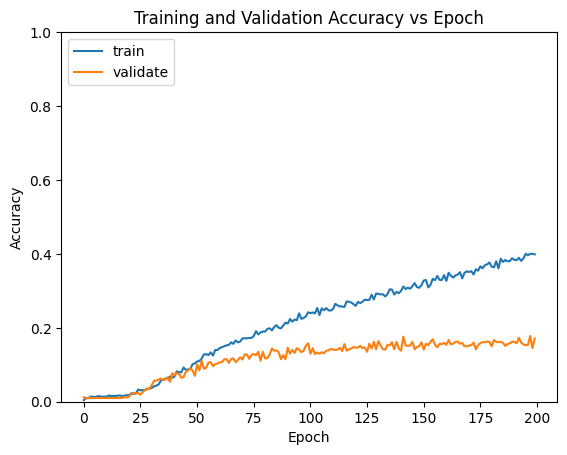

In [ ]:





accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[1] # train_data_images_illuminance_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_illuminance_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[5] # validation_data_images_illuminance_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_illuminance_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[9] # test_data_images_illuminance_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_illuminance_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_illuminance ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)






#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()






In [ ]:

print(accuracy)

[0.15399999916553497, 0.16099999845027924, 0.17299999296665192]


## Network one pathway Orientation and Location  

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 597ms/step - accuracy: 6.1143e-05 - loss: 10.7266 - val_accuracy: 0.0000e+00 - val_loss: 10.3558
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 3.7061e-04 - loss: 9.3851 - val_accuracy: 0.0000e+00 - val_loss: 10.1514
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0000e+00 - loss: 8.5361 - val_accuracy: 0.0000e+00 - val_loss: 10.1690
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 2.2891e-04 - loss: 8.2414 - val_accuracy: 0.0000e+00 - val_loss: 10.1984
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 2.2891e-04 - loss: 8.1252 - val_accuracy: 0.0000e+00 - val_loss: 10.3052
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0000e+00 - loss: 8.0269 - val_accuracy: 0.0000e+00 - val_loss: 10.2200
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0015 - loss: 8.0062 - val_accuracy: 0.0010 - val_loss: 10.2979
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms

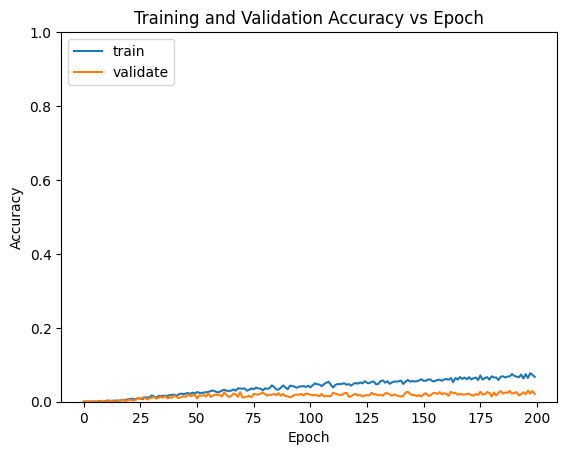

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.02800000086426735, 0.020999999716877937, 0.01600000075995922]


## Network one pathway Identity and Location   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3863 - loss: 1.9587 - val_accuracy: 0.3500 - val_loss: 7.7540
Epoch 505/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3905 - loss: 1.9156 - val_accuracy: 0.3480 - val_loss: 7.7543
Epoch 506/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3833 - loss: 1.9065 - val_accuracy: 0.3660 - val_loss: 7.8461
Epoch 507/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3792 - loss: 1.9328 - val_accuracy: 0.3660 - val_loss: 7.8614
Epoch 508/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3916 - loss: 1.8765 - val_accuracy: 0.3950 - val_loss: 7.7732
Epoch 509/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4040 - loss: 1.8842 - val_accuracy: 0.3700 - val_loss: 7.8310
Epoch 510/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3895 - loss: 1.9178 - val_accuracy: 0.3600 - val_loss: 7.6824
Epoch 511/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74

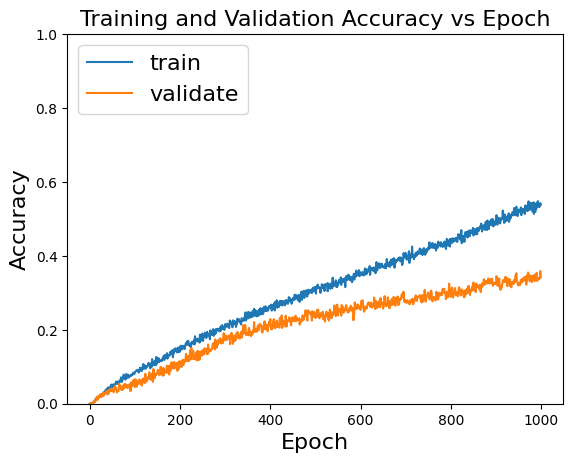

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_identities_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_identities_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=1000,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)



#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()



In [ ]:

print(accuracy)

# 0.4050000011920929, 0.3400000035762787, 0.4180000126361847
# 0.34700000286102295, 0.3319999873638153, 0.3199999928474426
# 0.42899999022483826, 0.3319999873638153, 0.3779999911785126



[0.42899999022483826, 0.3319999873638153, 0.3779999911785126]


## Network one pathway Identity and Orientation     

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 507ms/step - accuracy: 4.9612e-04 - loss: 7.4550 - val_accuracy: 0.0010 - val_loss: 7.4544
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 5.2602e-04 - loss: 7.4282 - val_accuracy: 0.0010 - val_loss: 7.4960
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0010 - loss: 7.3389 - val_accuracy: 0.0010 - val_loss: 7.5217
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 7.0393e-04 - loss: 7.2989 - val_accuracy: 0.0010 - val_loss: 7.6056
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0014 - loss: 7.2502 - val_accuracy: 0.0010 - val_loss: 7.6101
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0021 - loss: 7.2489 - val_accuracy: 0.0010 - val_loss: 7.5173
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0015 - loss: 7.2624 - val_accuracy: 0.0010 - val_loss: 7.6212
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0011 - loss: 7.2288 - va

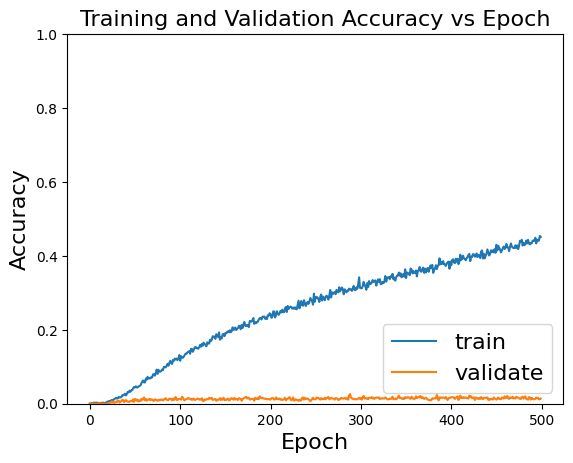

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_orientation ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=500,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='lower right', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.014999999664723873, 0.02500000037252903, 0.012000000104308128]


## Network one pathway Illuminance and Orientation  

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 1.8000e-04 - loss: 8.3120 - val_accuracy: 0.0010 - val_loss: 8.2879
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0014 - loss: 8.0813 - val_accuracy: 0.0000e+00 - val_loss: 8.2329
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0013 - loss: 7.7251 - val_accuracy: 0.0000e+00 - val_loss: 8.2844
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0020 - loss: 7.6157 - val_accuracy: 0.0010 - val_loss: 8.3328
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0016 - loss: 7.5631 - val_accuracy: 0.0010 - val_loss: 8.3351
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0016 - loss: 7.5233 - val_accuracy: 0.0010 - val_loss: 8.3761
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0014 - loss: 7.5104 - val_accuracy: 0.0010 - val_loss: 8.2393
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0016 - loss: 7.5018 - va

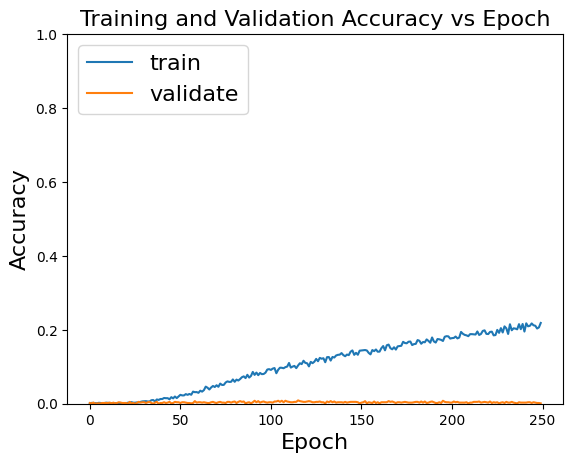

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_illuminance ** 3)*(number_of_classes_orientation ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=250,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.0020000000949949026, 0.006000000052154064, 0.003000000026077032]


## Network one pathway Illuminance and Location (Order by Location)  

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 509ms/step - accuracy: 6.2511e-04 - loss: 10.6993 - val_accuracy: 0.0000e+00 - val_loss: 10.0603
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0024 - loss: 8.9890 - val_accuracy: 0.0000e+00 - val_loss: 9.7643
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0016 - loss: 8.1491 - val_accuracy: 0.0000e+00 - val_loss: 9.5638
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0024 - loss: 7.9660 - val_accuracy: 0.0000e+00 - val_loss: 10.0513
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0018 - loss: 7.8054 - val_accuracy: 0.0000e+00 - val_loss: 9.6039
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0010 - loss: 7.7775 - val_accuracy: 0.0010 - val_loss: 10.2176
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0016 - loss: 7.7140 - val_accuracy: 0.0000e+00 - val_loss: 10.0377
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.002

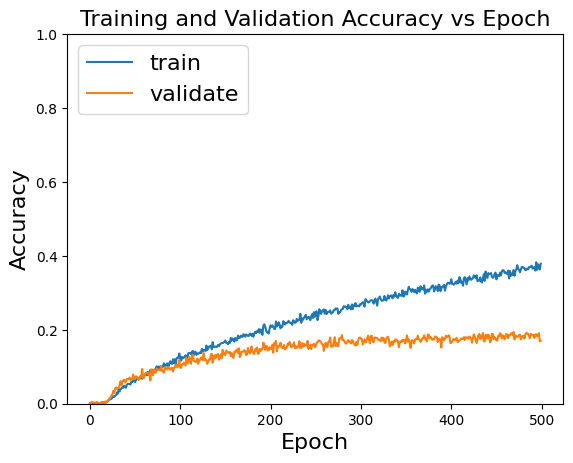

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_illuminance ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=500,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.13500000536441803, 0.1940000057220459, 0.18799999356269836]


# Pretrain the single pathway model

## Network one pathway Orientation and Location  

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network_Create():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))


      # model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network_Create()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True)
  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)

  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_pretrained_orientation.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_pretrained_orientation_model.h5")
  print("Saved model to disk")

  model_1 = CNN_network_Create()

  model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model_1.load_weights(DATA_PATH / 'CNN_network_pretrained_orientation_model.h5')

  layers_1 = model_1.layers

  pretrained_network_orientation = tf.keras.models.Sequential(layers_1[:-1])

  pretrained_network_orientation.add(tf.keras.layers.Dense(number_of_classes_location ** 3, activation='softmax'))

  pretrained_network_orientation.trainable = True

  pretrained_network_orientation.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  history = pretrained_network_orientation.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=200,batch_size=256,shuffle=True)
  scores = pretrained_network_orientation.evaluate(test_data_images,test_data_images_locations_without_order)

  # serialize model to JSON
  CNN_network_json = pretrained_network_orientation.to_json()
  with open(DATA_PATH / "CNN_network_pretrained_orientation_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  pretrained_network_orientation.save(DATA_PATH / "CNN_network_pretrained_orientation_location_model.h5")
  print("Saved model to disk")



  model_2 = CNN_network_Create()

  model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model_2.pop()

  model_2.add(tf.keras.layers.Dense(number_of_classes_location ** 3, activation='softmax'))

  model_2.load_weights(DATA_PATH / 'CNN_network_pretrained_orientation_location_model.h5')

  layers_2 = model_2.layers

  pretrained_network_orientation_location = tf.keras.models.Sequential(layers_2[:-1])

  pretrained_network_orientation_location.add(tf.keras.layers.Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3), activation='softmax'))

  pretrained_network_orientation_location.trainable = True

  pretrained_network_orientation_location.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  history = pretrained_network_orientation_location.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = pretrained_network_orientation_location.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 484ms/step - accuracy: 0.0168 - loss: 4.1594 - val_accuracy: 0.0150 - val_loss: 4.1587
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0180 - loss: 4.1580 - val_accuracy: 0.0150 - val_loss: 4.1583
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0191 - loss: 4.1572 - val_accuracy: 0.0150 - val_loss: 4.1582
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0179 - loss: 4.1544 - val_accuracy: 0.0150 - val_loss: 4.1582
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0168 - loss: 4.1520 - val_accuracy: 0.0150 - val_loss: 4.1482
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0226 - loss: 4.1351 - val_accuracy: 0.0120 - val_loss: 4.1043
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0195 - loss: 4.1162 - val_accuracy: 0.0130 - val_loss: 4.0635
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0208 - loss: 4.0663 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.0061 - loss: 7.4990 - val_accuracy: 0.0110 - val_loss: 5.4078
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0106 - loss: 5.2561 - val_accuracy: 0.0260 - val_loss: 4.5987
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0156 - loss: 4.7206 - val_accuracy: 0.0290 - val_loss: 4.4136
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0188 - loss: 4.5160 - val_accuracy: 0.0450 - val_loss: 4.1054
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0420 - loss: 4.2102 - val_accuracy: 0.0800 - val_loss: 3.6956
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0698 - loss: 3.9081 - val_accuracy: 0.1620 - val_loss: 3.1369
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1143 - loss: 3.4379 - val_accuracy: 0.2960 - val_loss: 2.5357
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1788 - loss: 2.9541

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0027 - loss: 10.8312 - val_accuracy: 0.0150 - val_loss: 10.1611
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0335 - loss: 8.3123 - val_accuracy: 0.0070 - val_loss: 8.6832
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0461 - loss: 5.7768 - val_accuracy: 0.0130 - val_loss: 9.1936
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0337 - loss: 4.8324 - val_accuracy: 0.0130 - val_loss: 9.6318
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0417 - loss: 4.5270 - val_accuracy: 0.0140 - val_loss: 10.1730
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0343 - loss: 4.3491 - val_accuracy: 0.0170 - val_loss: 9.7426
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0329 - loss: 4.2413 - val_accuracy: 0.0170 - val_loss: 10.1491
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0321 - loss: 4.

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 537ms/step - accuracy: 0.0049 - loss: 7.0597 - val_accuracy: 0.0100 - val_loss: 5.6388
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0129 - loss: 5.3788 - val_accuracy: 0.0160 - val_loss: 4.6096
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0155 - loss: 4.6890 - val_accuracy: 0.0420 - val_loss: 4.2007
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0363 - loss: 4.3196 - val_accuracy: 0.0870 - val_loss: 3.5877
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0787 - loss: 3.7936 - val_accuracy: 0.2330 - val_loss: 2.8376
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1358 - loss: 3.2227 - val_accuracy: 0.4130 - val_loss: 2.0857
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2091 - loss: 2.6782 - val_accuracy: 0.5270 - val_loss: 1.6672
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2806 - loss: 2.2

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.0030 - loss: 10.7792 - val_accuracy: 0.0090 - val_loss: 10.0634
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0324 - loss: 8.0938 - val_accuracy: 0.0120 - val_loss: 8.7668
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0396 - loss: 5.7340 - val_accuracy: 0.0170 - val_loss: 8.9142
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0423 - loss: 4.8154 - val_accuracy: 0.0140 - val_loss: 9.7521
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0363 - loss: 4.4178 - val_accuracy: 0.0140 - val_loss: 10.1954
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0343 - loss: 4.3019 - val_accuracy: 0.0100 - val_loss: 10.2232
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0341 - loss: 4.2052 - val_accuracy: 0.0170 - val_loss: 10.4882
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0317 - loss

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.0038 - loss: 7.6354 - val_accuracy: 0.0090 - val_loss: 5.5752
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0132 - loss: 5.3173 - val_accuracy: 0.0160 - val_loss: 4.5134
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0256 - loss: 4.6076 - val_accuracy: 0.0560 - val_loss: 4.1332
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0486 - loss: 4.2695 - val_accuracy: 0.1020 - val_loss: 3.6322
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0609 - loss: 3.8817 - val_accuracy: 0.1870 - val_loss: 3.0480
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1047 - loss: 3.4038 - val_accuracy: 0.2630 - val_loss: 2.5331
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1524 - loss: 2.9680 - val_accuracy: 0.4050 - val_loss: 2.0582
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2108 - loss: 2.6

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 498ms/step - accuracy: 0.0034 - loss: 10.8422 - val_accuracy: 0.0070 - val_loss: 10.2376
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0230 - loss: 8.4460 - val_accuracy: 0.0100 - val_loss: 8.9245
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0374 - loss: 5.9122 - val_accuracy: 0.0180 - val_loss: 9.2615
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0377 - loss: 4.8924 - val_accuracy: 0.0210 - val_loss: 9.9828
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0450 - loss: 4.5282 - val_accuracy: 0.0210 - val_loss: 9.9946
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0364 - loss: 4.3887 - val_accuracy: 0.0210 - val_loss: 10.1940
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0391 - loss: 4.2868 - val_accuracy: 0.0280 - val_loss: 10.2636
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0338 - loss:

In [ ]:

print(accuracy)

[0.023000000044703484, 0.019999999552965164, 0.01899999938905239]


# Train a single pathway model with less parameters (half number of units)  

## Network one pathway Orientation and Location  

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.0000e+00 - loss: 10.7497 - val_accuracy: 0.0000e+00 - val_loss: 10.7382
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.6736e-04 - loss: 10.3008 - val_accuracy: 0.0000e+00 - val_loss: 10.2860
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 5.6209e-04 - loss: 8.7156 - val_accuracy: 0.0000e+00 - val_loss: 10.1431
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 8.1781e-04 - loss: 8.3244 - val_accuracy: 0.0000e+00 - val_loss: 10.2062
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.9609e-04 - loss: 8.2003 - val_accuracy: 0.0000e+00 - val_loss: 10.4252
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0020 - loss: 8.0836 - val_accuracy: 0.0000e+00 - val_loss: 10.6745
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 4.4730e-05 - loss: 8.0347 - val_accuracy: 0.0000e+00 - val_loss: 10.6474
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36

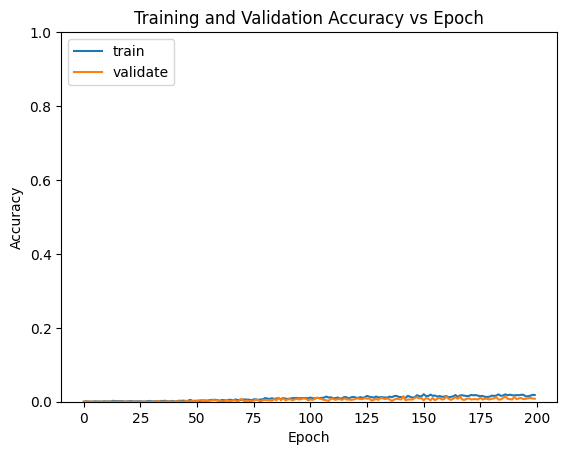

In [ ]:

accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(50,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(50,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(50,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.006000000052154064, 0.013000000268220901, 0.00800000037997961]


# Train a two pathway network as a whole in a single process

In [ ]:

accuracy = []

initial_learning_rate = 0.001

number_of_repetitions = 1

for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")


  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")



  model_1 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = True
  new_model_2.trainable = True


  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate = initial_learning_rate),metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=1000,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))




print(accuracy)


Saved model to disk
Saved model to disk


Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 550ms/step - accuracy: 3.7061e-04 - loss: 10.7448 - val_accuracy: 0.0000e+00 - val_loss: 10.4545
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 5.6209e-04 - loss: 9.2558 - val_accuracy: 0.0000e+00 - val_loss: 10.0910
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 9.1269e-04 - loss: 8.5661 - val_accuracy: 0.0000e+00 - val_loss: 10.2686
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0011 - loss: 8.2037 - val_accuracy: 0.0000e+00 - val_loss: 10.1865
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 7.9187e-04 - loss: 8.1001 - val_accuracy: 0.0000e+00 - val_loss: 10.4633
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 4.4720e-04 - loss: 8.0427 - val_accuracy: 0.0000e+00 - val_loss: 10.5035
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0016 - loss: 7.9936 - val_accuracy: 0.0000e+00 - val_loss: 10.3684
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━

# Try different learning rates

## Network one pathway Orientation and Location  

### initial_learning_rate = 0.1

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 499ms/step - accuracy: 5.3798e-04 - loss: 6886.8301 - val_accuracy: 0.0000e+00 - val_loss: 10.2774
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0010 - loss: 9.5114 - val_accuracy: 0.0000e+00 - val_loss: 9.9667
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0012 - loss: 8.5751 - val_accuracy: 0.0000e+00 - val_loss: 10.1982
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0018 - loss: 8.1492 - val_accuracy: 0.0000e+00 - val_loss: 10.4323
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 6.8378e-04 - loss: 7.9879 - val_accuracy: 0.0000e+00 - val_loss: 10.5886
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0011 - loss: 7.9518 - val_accuracy: 0.0000e+00 - val_loss: 10.7045
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 9.5099e-04 - loss: 7.9458 - val_accuracy: 0.0000e+00 - val_loss: 10.7966
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step -

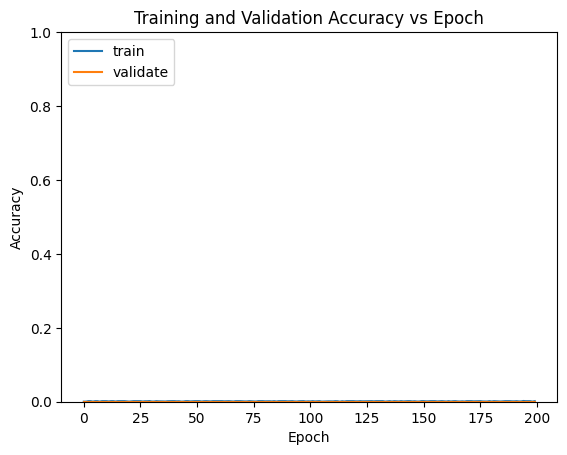

In [ ]:

initial_learning_rate = 0.1

accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()

  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate = initial_learning_rate),metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.0, 0.0010000000474974513, 0.0]


### initial_learning_rate = 0.01

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 496ms/step - accuracy: 0.0000e+00 - loss: 22.2611 - val_accuracy: 0.0000e+00 - val_loss: 10.6775
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0013 - loss: 10.4501 - val_accuracy: 0.0000e+00 - val_loss: 10.0861
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 7.9187e-04 - loss: 8.7243 - val_accuracy: 0.0000e+00 - val_loss: 10.1644
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0000e+00 - loss: 8.3102 - val_accuracy: 0.0010 - val_loss: 10.4699
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0000e+00 - loss: 8.0897 - val_accuracy: 0.0000e+00 - val_loss: 10.6677
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 5.5727e-04 - loss: 8.0501 - val_accuracy: 0.0000e+00 - val_loss: 11.0762
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0011 - loss: 8.0135 - val_accuracy: 0.0000e+00 - val_loss: 11.0181
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/st

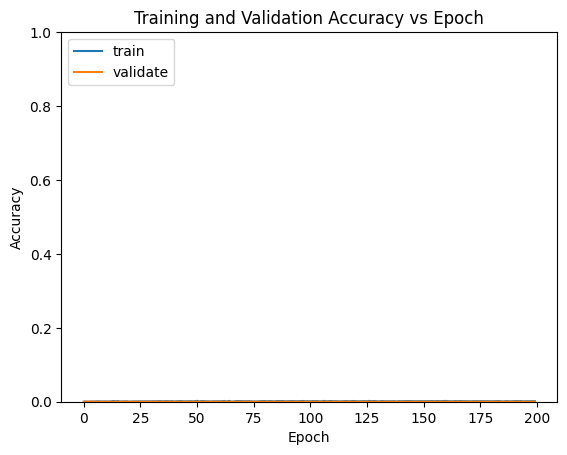

In [ ]:

initial_learning_rate = 0.01

accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()

  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate = initial_learning_rate),metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.0, 0.0, 0.0]


### initial_learning_rate = 0.0001

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.0000e+00 - loss: 10.7505 - val_accuracy: 0.0000e+00 - val_loss: 10.7500
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0015 - loss: 10.7488 - val_accuracy: 0.0010 - val_loss: 10.7489
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 4.3457e-04 - loss: 10.7431 - val_accuracy: 0.0010 - val_loss: 10.7113
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0013 - loss: 10.3199 - val_accuracy: 0.0020 - val_loss: 10.2843
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 7.9720e-04 - loss: 9.0913 - val_accuracy: 0.0010 - val_loss: 10.2564
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 5.8037e-04 - loss: 8.5309 - val_accuracy: 0.0000e+00 - val_loss: 10.3073
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 2.2065e-04 - loss: 8.3458 - val_accuracy: 0.0000e+00 - val_loss: 10.3613
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accur

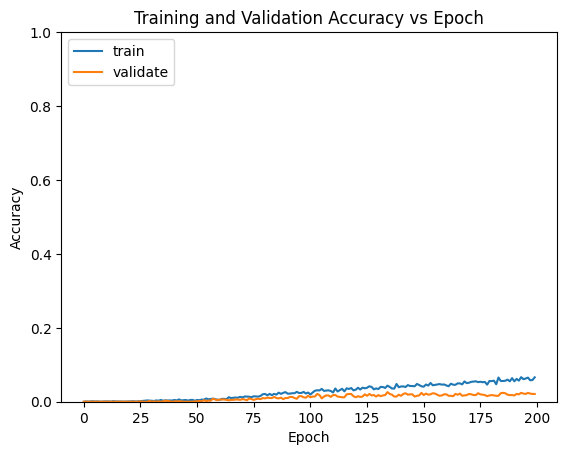

In [ ]:

initial_learning_rate = 0.0001

accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()

  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate = initial_learning_rate),metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.028999999165534973, 0.02199999988079071, 0.014999999664723873]


# end of notebook